In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt

* .to_datetime()
* .set_index(inplace = )
* .plot()
* .rolling(25).mean().plot()
* .index
* .sort_index(inpalce = )
* .sort_values()
* .dropna( inplace = )
* f''
* .empty
* .join()

## 1.data import and pre-processing

In [16]:
df = pd.read_csv('./Desktop/avocado.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')# df.set_index('Date',inplace = True)
#df.drop(['Unnamed:'],axis = 1)

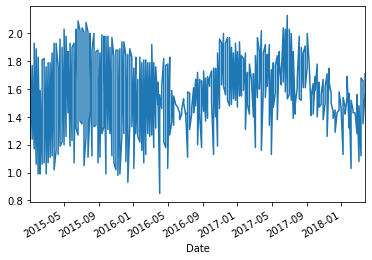

In [21]:
albany = df[df['region'] == 'Albany']
albany['AveragePrice'].plot()

#### moving average

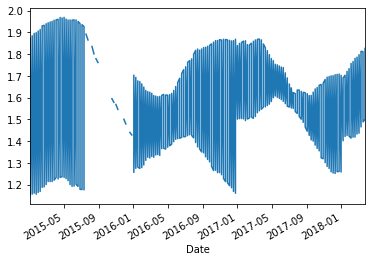

In [23]:
albany['AveragePrice'].rolling(25).mean().plot()

In [24]:
albany.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

#### we can see that date is not in proper order, so we to sort the date in proper order

In [27]:
albany.sort_index(inplace = True)

/Users/wuhaitao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


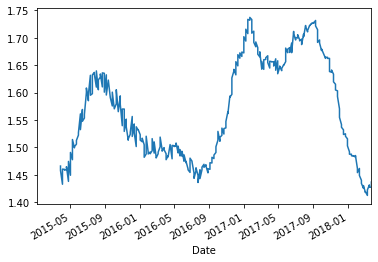

In [29]:
albany['AveragePrice'].rolling(25).mean().plot()

In [30]:
pa25ma = albany['AveragePrice'].rolling(25).mean()

In [34]:
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [37]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region'] == region]#copy() is to aviod warning.
    region_df.set_index('Date',inplace = True)
    region_df.sort_index(inplace = True)
    region_df[f'{region}_pa25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_pa25ma']]# double [] return list
    else:
        graph_df = graph_df.join(region_df[f'{region}_pa25ma'])

Albany


KeyError: "None of ['Date'] are in the columns"

In [38]:
df['type'].tail(3),df['type'].tail(3)

(Date
 2018-01-21    organic
 2018-01-14    organic
 2018-01-07    organic
 Name: type, dtype: object, Date
 2018-01-21    organic
 2018-01-14    organic
 2018-01-07    organic
 Name: type, dtype: object)

#### we can see that index(date) is not unique, we need unique index

In [42]:
df = pd.read_csv('./Desktop/avocado.csv')
df = df.copy()[df['type']=='organic']
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by = 'Date',inplace = True,ascending = True)
#df = df.set_index('Date')

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington


In [59]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date',inplace = True)
    region_df.sort_index(inplace = True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

California
            California_price25ma
Date                            
2015-01-04                   NaN
2015-01-11                   NaN
2015-01-18                   NaN
2015-01-25                   NaN
2015-02-01                   NaN
...                          ...
2018-02-25                1.9128
2018-03-04                1.8876
2018-03-11                1.8636
2018-03-18                1.8516
2018-03-25                1.8364

[169 rows x 1 columns]
LasVegas
            LasVegas_price25ma
Date                          
2015-01-04                 NaN
2015-01-11                 NaN
2015-01-18                 NaN
2015-01-25                 NaN
2015-02-01                 NaN
...                        ...
2018-02-25              1.9120
2018-03-04              1.8748
2018-03-11              1.8440
2018-03-18              1.8204
2018-03-25              1.7968

[169 rows x 1 columns]
PhoenixTucson
            PhoenixTucson_price25ma
Date                               
2015-01-04    

In [56]:
graph_df

# where did index(Date) come from

# dateframe retuen required values and it's index

,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,Orlando_price25ma,Southeast_price25ma,Boise_price25ma,MiamiFtLauderdale_price25ma,NorthernNewEngland_price25ma,BaltimoreWashington_price25ma
Date,,,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,1.8728,1.7116,2.0512,1.7140,1.6280,1.5836
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,1.8512,1.6868,2.0176,1.7068,1.6224,1.5772
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,1.8004,1.6484,1.9836,1.6904,1.6264,1.5732


In [57]:
region_df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,BaltimoreWashington_price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,BaltimoreWashington,NaN
2015-01-11,50,1.22,26008.88,12258.26,7094.53,490.24,6165.85,6165.85,0.00,0.0,organic,2015,BaltimoreWashington,NaN
2015-01-18,49,1.41,14057.45,8148.89,4725.43,659.56,523.57,461.75,61.82,0.0,organic,2015,BaltimoreWashington,NaN
2015-01-25,48,1.41,15387.74,8097.26,5023.48,528.36,1738.64,1738.64,0.00,0.0,organic,2015,BaltimoreWashington,NaN
2015-02-01,47,1.15,27929.74,14635.12,8013.19,667.82,4613.61,4613.61,0.00,0.0,organic,2015,BaltimoreWashington,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,4,1.47,47421.15,1626.30,7913.27,49.45,37832.13,37822.13,10.00,0.0,organic,2018,BaltimoreWashington,1.5836
2018-03-04,3,1.43,43300.77,2360.20,6371.68,93.52,34475.37,34475.37,0.00,0.0,organic,2018,BaltimoreWashington,1.5772
2018-03-11,2,1.44,48044.77,1885.84,6874.81,96.69,39187.43,39177.43,10.00,0.0,organic,2018,BaltimoreWashington,1.5732


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd916def150>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd9172afed0>)

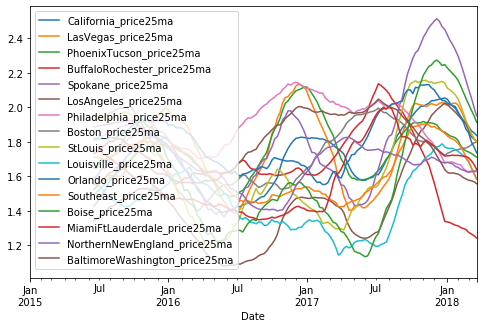

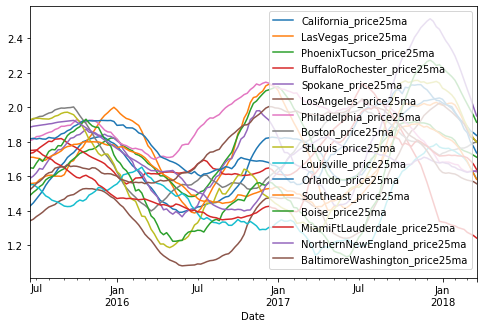

In [64]:
graph_df.plot(figsize=(8,5),legend = True),graph_df.dropna().plot(figsize=(8,5),legend = True)